# 1.Environment Setup

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

In [5]:
#!pip install copernicusmarine

  Using cached copernicusmarine-2.0.1-py3-none-any.whl.metadata (8.0 kB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 5.1 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=d56e1dd5eb159859a9b853cc619be12053e68803c5c0a8740c3ce44f79440e46
  Stored in directory: /root/.cache/pip/wheels/71/c1/da/23077eb3b87d24d6f3852ed1ed1a1ac2d3c885ad6ebd2b4a07
Successfully built asciitree


In [2]:
import copernicusmarine as cm

# 2. Optics

## 2.1 Data Download

### 2.1.1 Download from Copernicus

In [13]:
# Optics L4
cm.subset(
  dataset_id="cmems_obs-oc_atl_bgc-optics_my_l3-multi-1km_P1D",
  minimum_longitude=-10.7636430359399,
  maximum_longitude=-2.148977569252043,
  minimum_latitude=49.131743778296155,
  maximum_latitude=52.238672307265546,
  start_datetime="2023-02-01T00:00:00",
  end_datetime="2025-02-01T23:59:59",
  output_filename="Optics_L3_P1D_Feb23-25.nc",
  output_directory="/Users/imarcolic/Desktop/1 ACADEMIA/2.0 MSc LSE/1 MSc Data Science/ST498 Capstone/Imar not on Github/copernicus-data"
)

username:password:

INFO - 2025-02-20T17:57:30Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2025-02-20T17:57:30Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2025-02-20T17:57:31Z - Service was not specified, the default one was selected: "arco-time-series"
INFO - 2025-02-20T17:57:32Z - Downloading using service arco-time-series...
INFO - 2025-02-20T17:57:34Z - <xarray.Dataset>
Dimensions:          (time: 732, latitude: 298, longitude: 827)
Coordinates:
  * latitude         (latitude) float32 49.14 49.15 49.16 ... 52.21 52.22 52.23
  * longitude        (longitude) float32 -10.76 -10.74 -10.73 ... -2.161 -2.151
  * time             (time) datetime64[ns] 2023-02-01 2023-02-02 ... 2025-02-01
Data variables:
    BBP              (time, latitude, longitude) float32 dask.array<chunksize=(732, 16, 16), meta=np.ndarray>
    BBP_uncertainty  (time, latitude, longitude) float32 dask.array<chunksize=(732, 16, 16), meta=np.ndarray>
    CDM        

  0%|          | 0/74514 [00:00<?, ?it/s]

INFO - 2025-02-20T18:03:38Z - Successfully downloaded to /Users/imarcolic/Desktop/1 ACADEMIA/2.0 MSc LSE/1 MSc Data Science/ST498 Capstone/Imar not on Github/copernicus-data/Optics_L3_P1D_Feb23-25.nc


PosixPath('/Users/imarcolic/Desktop/1 ACADEMIA/2.0 MSc LSE/1 MSc Data Science/ST498 Capstone/Imar not on Github/copernicus-data/Optics_L3_P1D_Feb23-25.nc')

### 2.1.2 Setup Data from local file

In [14]:
DS = xr.open_dataset("/Users/imarcolic/Desktop/1 ACADEMIA/2.0 MSc LSE/1 MSc Data Science/ST498 Capstone/Imar not on Github/copernicus-data/Optics_L3_P1D_Feb23-25.nc")

# Convert the xarray dataset to a DataFrame
Optics_L3_P1D_Feb23_25 = DS.to_dataframe().reset_index()

# # Save the DataFrame as a CSV file
# optics_csv_file_path = "/Users/imarcolic/Desktop/1 ACADEMIA/2.0 MSc LSE/1 MSc Data Science/ST498 Capstone/Imar not on Github/copernicus-data/Optics_L3_P1D_Feb23_25.csv"
# Optics_L3_P1D_Feb23_25.to_csv(optics_csv_file_path, index=False)

# print(f"CSV file saved as: {optics_csv_file_path}")

## 2.2 Data Cleaning

In [15]:
opt_df = Optics_L3_P1D_Feb23_25
opt_df.head(10)

,time,latitude,longitude,BBP,BBP_uncertainty,CDM,CDM_uncertainty,flags
0,2023-02-01,49.140625,-10.755207,NaN,NaN,NaN,NaN,0
1,2023-02-01,49.140625,-10.744791,NaN,NaN,NaN,NaN,0
2,2023-02-01,49.140625,-10.734374,NaN,NaN,NaN,NaN,0
3,2023-02-01,49.140625,-10.723957,NaN,NaN,NaN,NaN,0
4,2023-02-01,49.140625,-10.713541,NaN,NaN,NaN,NaN,0
5,2023-02-01,49.140625,-10.703124,NaN,NaN,NaN,NaN,0
6,2023-02-01,49.140625,-10.692707,NaN,NaN,NaN,NaN,0
7,2023-02-01,49.140625,-10.682291,NaN,NaN,NaN,NaN,0
8,2023-02-01,49.140625,-10.671874,NaN,NaN,NaN,NaN,0
9,2023-02-01,49.140625,-10.661457,NaN,NaN,NaN,NaN,0


### 2.2.1 Check NaN Values

In [20]:
nan_counts = opt_df.isnull().sum()
print("Number of NaN values in each column:")
print(nan_counts)

# Save NaN report
nan_report_path = "nan_report.csv"
nan_counts.to_csv(nan_report_path, header=["NaN Count"])
print(f"NaN report saved as: {nan_report_path}")

Number of NaN values in each column:
time                       0
latitude                   0
longitude                  0
BBP                139352304
BBP_uncertainty    139352304
CDM                138676850
CDM_uncertainty    138676850
flags                      0
dtype: int64
NaN report saved as: nan_report.csv


### 2.2.2 Filtering out NaN values

In [16]:
# Removing rows where BBP, BBP_uncertainty, CDM, and CDM_uncertainty are NaN
opt_filtered_df = opt_df.dropna(subset=["BBP", "BBP_uncertainty", "CDM", "CDM_uncertainty"])

# Checking for NaN values after filtering
nan_counts_filtered = opt_filtered_df.isnull().sum()
print("Number of NaN values in opt_filtered_df:")
print(nan_counts_filtered)

# # Save filtered dataset
# filtered_csv_path = "filtered_df_feb.csv"
# opt_filtered_df.to_csv(filtered_csv_path, index=False)
# print(f"Filtered DataFrame saved as: {filtered_csv_path}")


Number of NaN values in opt_filtered_df:
time               0
latitude           0
longitude          0
BBP                0
BBP_uncertainty    0
CDM                0
CDM_uncertainty    0
flags              0
dtype: int64


### 2.2.3 Analyzing Flags

In [17]:
print("Unique values in 'flags' column:")
print(opt_filtered_df['flags'].unique())

# Count occurrences of each flag value
print("Counts of each unique flag:")
print(opt_filtered_df['flags'].value_counts())

# Checking non-zero flag values
opt_non_zero_flags = opt_filtered_df[opt_filtered_df['flags'] != 0]
if not opt_non_zero_flags.empty:
    print("Rows with 'flags' not equal to 0:")
    print(opt_non_zero_flags.head())

# If needed, remove flagged data
opt_filtered_df = opt_filtered_df[opt_filtered_df['flags'] == 0]
print(f"Filtered dataset now contains {opt_filtered_df.shape[0]} rows.")

Unique values in 'flags' column:
[0]
Counts of each unique flag:
flags
0    40999151
Name: count, dtype: int64
Filtered dataset now contains 40999151 rows.


## 2.3 Data Visualisation

### 2.3.1 Histogram of KD490 and zsd

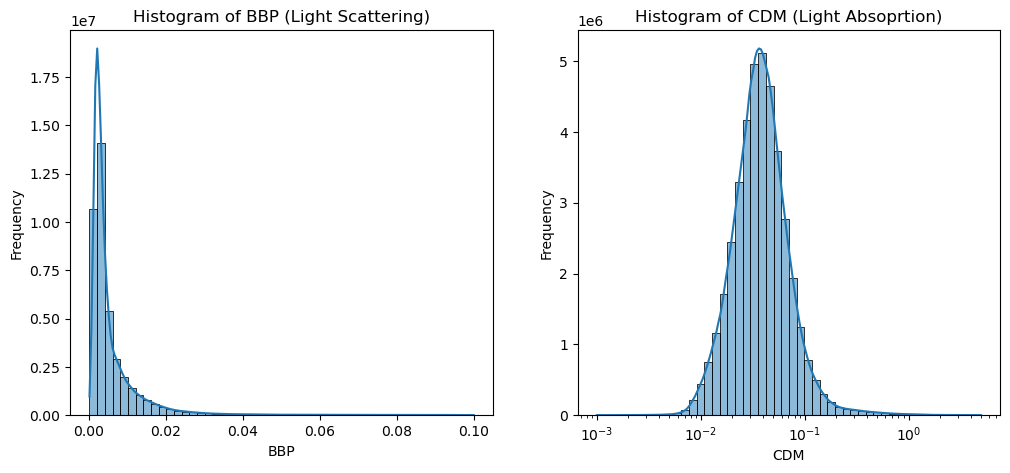

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(opt_filtered_df["BBP"], bins=50, kde=True)
plt.title("Histogram of BBP (Light Scattering)")
plt.xlabel("BBP")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(opt_filtered_df["CDM"], bins=50, kde=True, log_scale=True)
plt.title("Histogram of CDM (Light Absoprtion)")
plt.xlabel("CDM")
plt.ylabel("Frequency")
plt.show()

### 2.3.2 Time Series Plot of KD490 and zsd

<Figure size 1000x600 with 0 Axes>

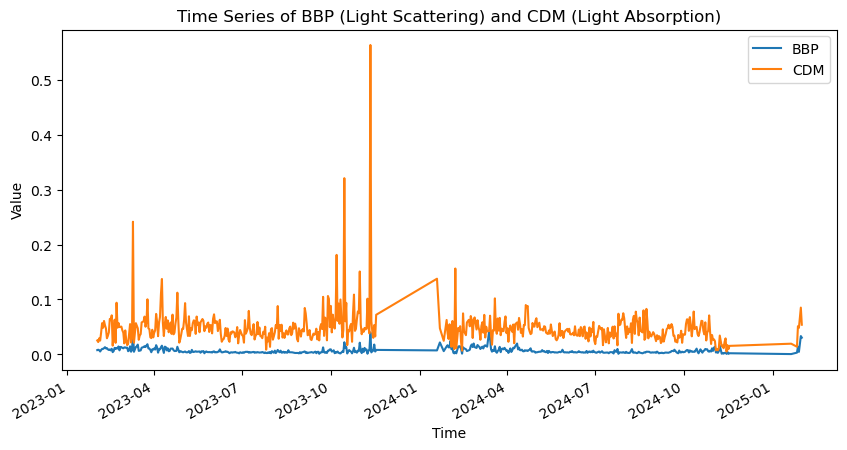

In [37]:
plt.figure(figsize=(10, 6))
opt_filtered_df.groupby("time")[["BBP", "CDM"]].mean().plot(figsize=(10, 5))
plt.title("Time Series of BBP (Light Scattering) and CDM (Light Absorption)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(["BBP", "CDM"])
plt.show()

<Figure size 1000x600 with 0 Axes>

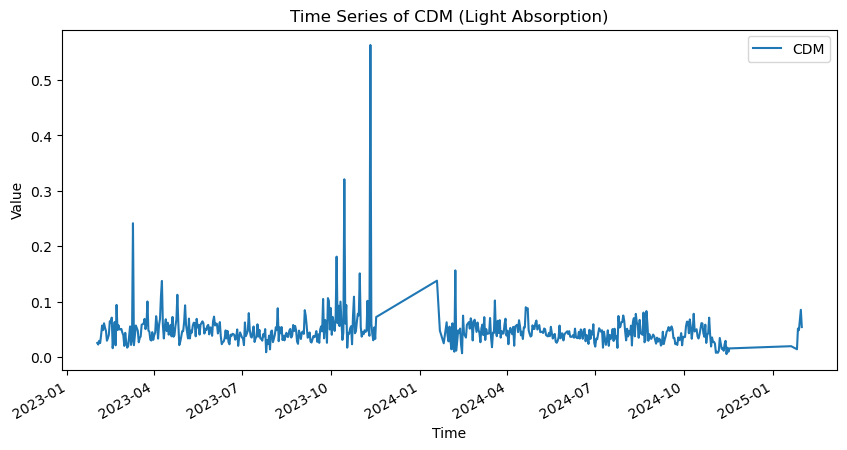

In [19]:
plt.figure(figsize=(10, 6))
opt_filtered_df.groupby("time")[["CDM"]].mean().plot(figsize=(10, 5))
plt.title("Time Series of CDM (Light Absorption)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(["CDM"])
plt.show()

### 2.3.3 Scatter Plot of KD490 and zsd

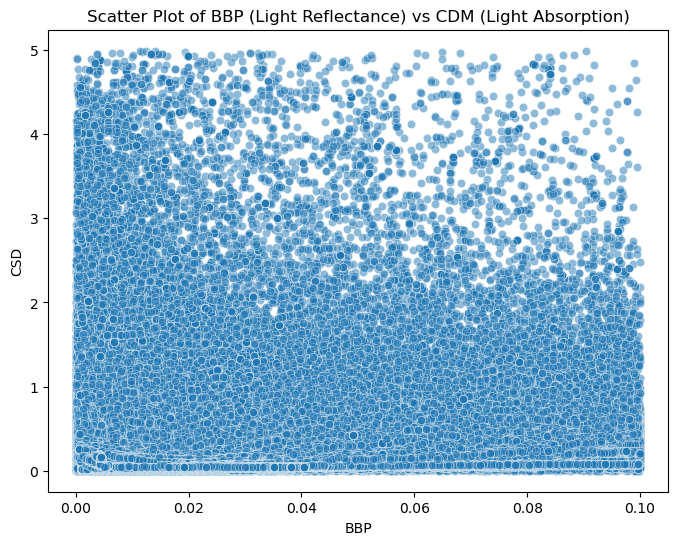

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=opt_filtered_df["BBP"], y=opt_filtered_df["CDM"], alpha=0.5)
plt.xlabel("BBP")
plt.ylabel("CSD")
plt.title("Scatter Plot of BBP (Light Reflectance) vs CDM (Light Absorption)")
plt.show()

### 2.3.4 Heatmap of KD490 and zsd

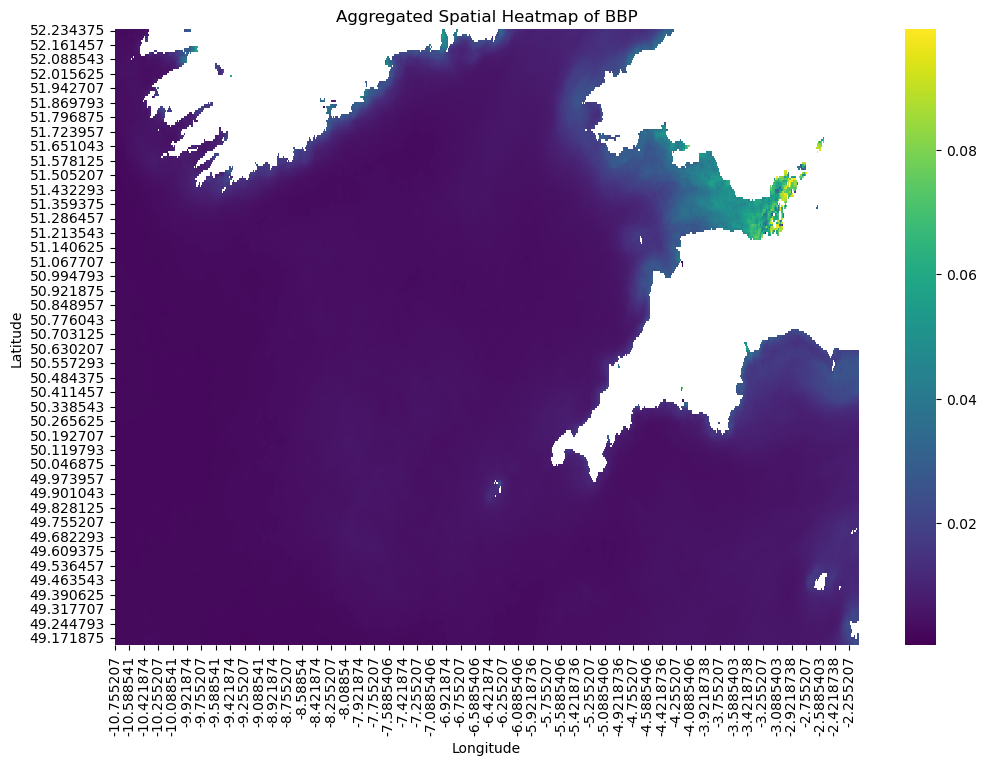

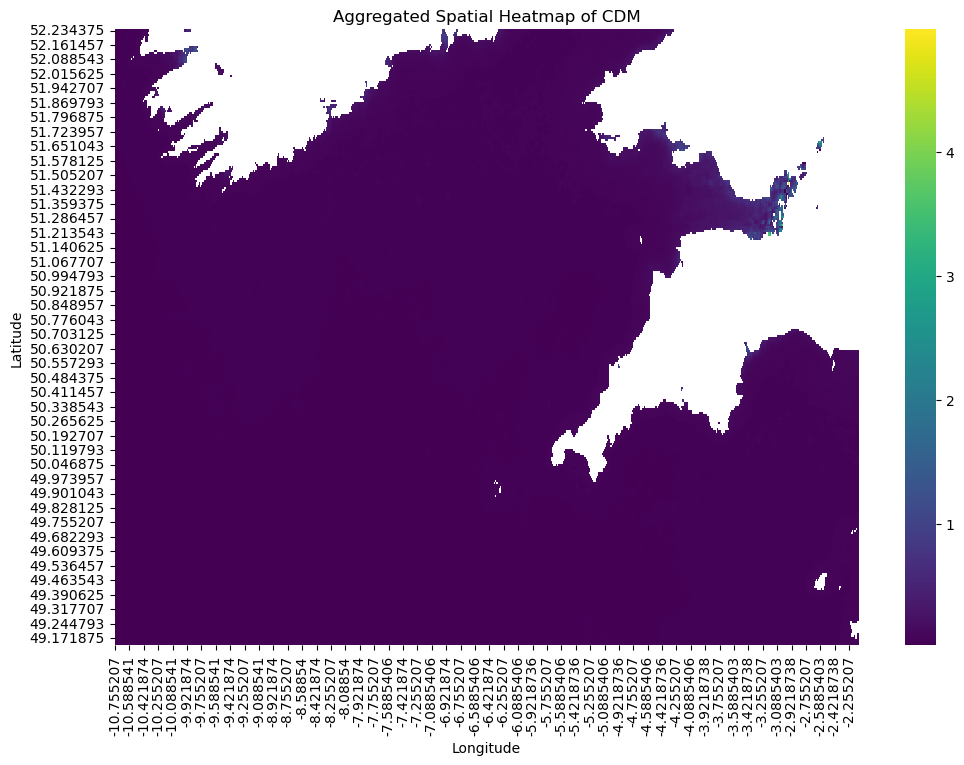

In [33]:
for col, title in zip(["BBP", "CDM"], ["BBP", "CDM"]):
    opt_aggregated_df = opt_filtered_df.groupby(["latitude", "longitude"], as_index=False)[col].mean()
    opt_spatial_df = opt_aggregated_df.pivot(index="latitude", columns="longitude", values=col)
    opt_spatial_df = opt_spatial_df[::-1]  # Reverse the order of latitude
    plt.figure(figsize=(12, 8))
    sns.heatmap(opt_spatial_df, cmap="viridis", cbar=True)
    plt.title(f"Aggregated Spatial Heatmap of {title}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

### 2.3.5 Boxplot of ZSD by month

In [ ]:
# Load the Transparency dataset
opt_df_2 = pd.read_csv("/Users/imarcolic/Desktop/1 ACADEMIA/2.0 MSc LSE/1 MSc Data Science/ST498 Capstone/Imar not on Github/copernicus-data/Optics_L3_P1D_Feb23_25.csv", parse_dates=["time"])

# Handle missing values by dropping rows where ZSD or ZSD_uncertainty is NaN
opt_df_2 = opt_df_2.dropna(subset=["BBP", "BBP_uncertainty"])

# Extract Month for Monthly Analysis
opt_df_2["month"] = opt_df_2["time"].dt.month

/var/folders/_m/8v50fh8s6lsfsxj91ft8w3740000gn/T/ipykernel_43418/1341438211.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="BBP", data=opt_df_2, palette="coolwarm")


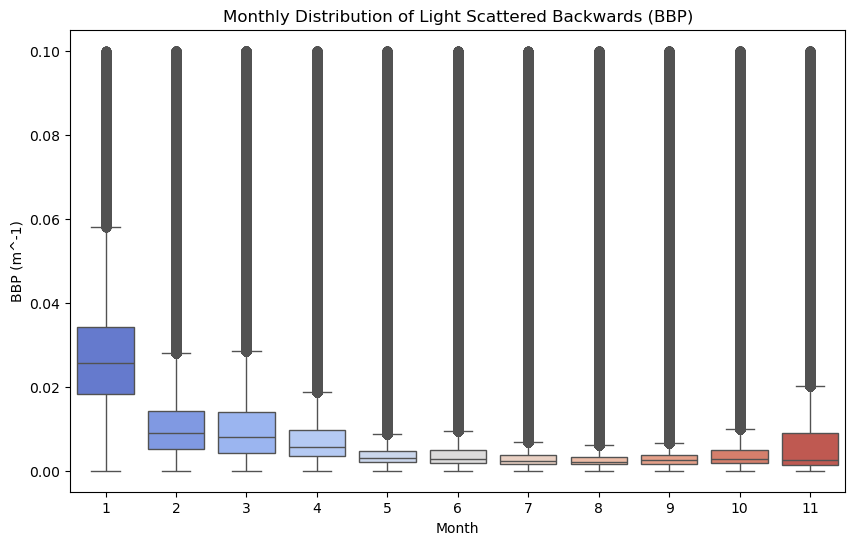

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="month", y="BBP", data=opt_df_2, palette="coolwarm")
plt.title("Monthly Distribution of Light Scattered Backwards (BBP)")
plt.xlabel("Month")
plt.ylabel("BBP (m^-1)")
plt.show()

### 2.3.6 Monthly Heatmap of Water Transparency

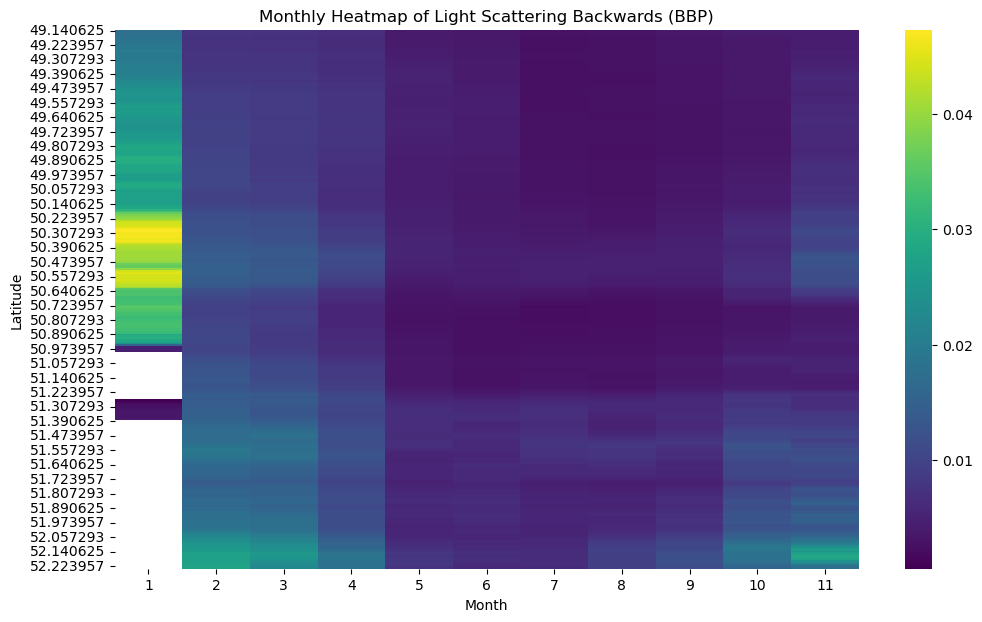

In [39]:
pivot_table = opt_df_2.pivot_table(values="BBP", index="latitude", columns="month", aggfunc="mean")
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table, cmap="viridis", cbar=True)
plt.title("Monthly Heatmap of Light Scattering Backwards (BBP)")
plt.xlabel("Month")
plt.ylabel("Latitude")
plt.show()

### 2.3.7 Histogram of ZSD Uncertainty

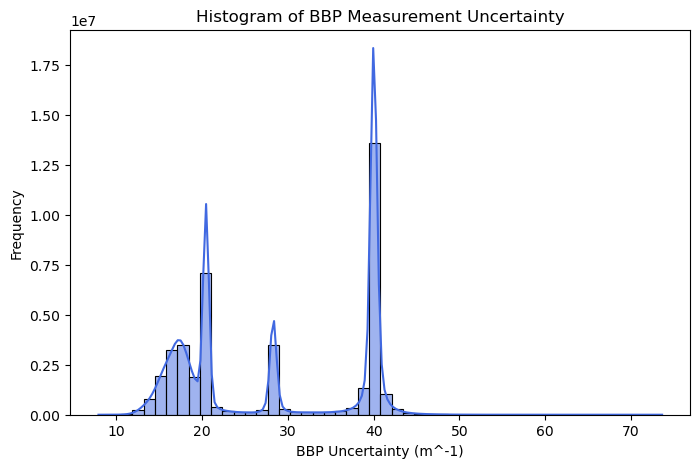

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(opt_df_2["BBP_uncertainty"], bins=50, kde=True, color="royalblue")
plt.title("Histogram of BBP Measurement Uncertainty")
plt.xlabel("BBP Uncertainty (m^-1)")
plt.ylabel("Frequency")
plt.show()

### 2.3.8 3D Scatter Plot of ZSD vs Langitude vs Longitude

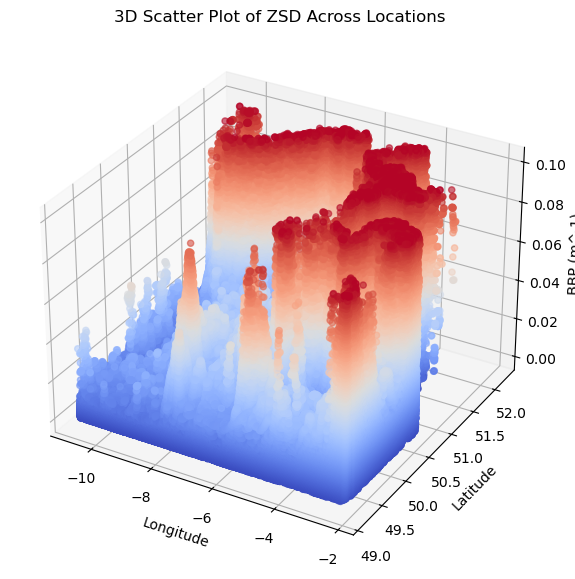

In [41]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(opt_df_2["longitude"], opt_df_2["latitude"], opt_df_2["BBP"], c=opt_df_2["BBP"], cmap="coolwarm", alpha=0.6)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("BBP (m^-1)")
ax.set_title("3D Scatter Plot of ZSD Across Locations")
plt.show()

### 2.3.9 Seasonal Decomposition of ZSD

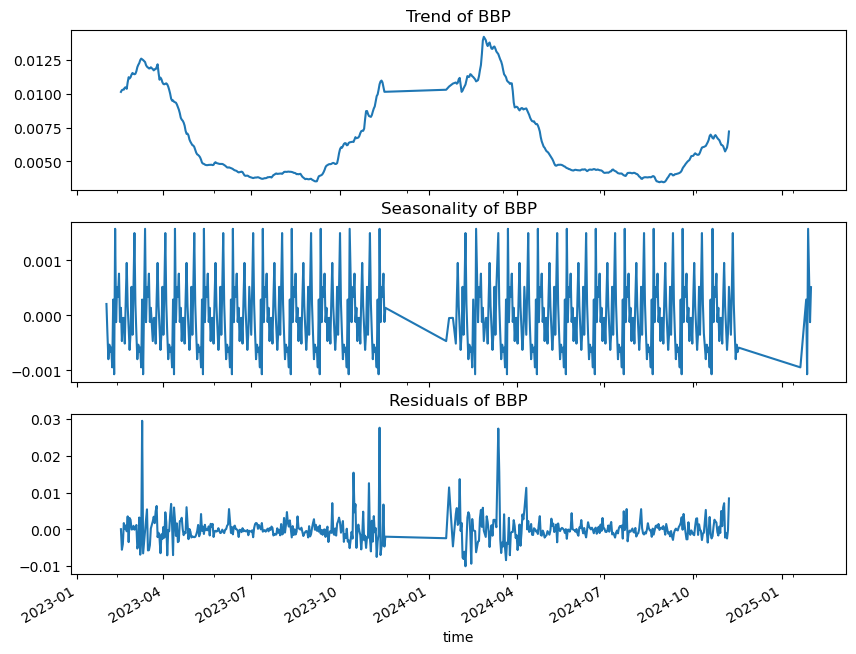

In [42]:
opt_df_daily = opt_df_2.groupby("time")["BBP"].mean().reset_index()
opt_df_daily = opt_df_daily.set_index("time")
decomposition = sm.tsa.seasonal_decompose(opt_df_daily, model="additive", period=30)

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
decomposition.trend.plot(ax=axes[0], title="Trend of BBP")
decomposition.seasonal.plot(ax=axes[1], title="Seasonality of BBP")
decomposition.resid.plot(ax=axes[2], title="Residuals of BBP")
plt.show()

### 2.3.10 Correlation Heatmap of (ZSD, KD490, CHL, Uncertainty)

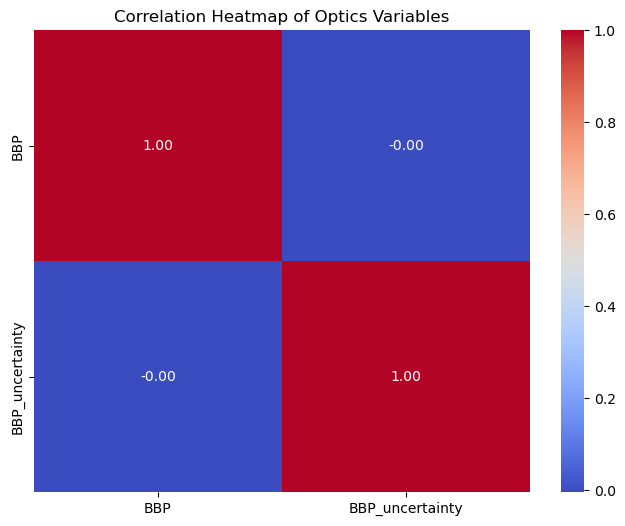

In [43]:
corr_columns = ["BBP", "BBP_uncertainty"]
corr_matrix = opt_df_2[corr_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Optics Variables")
plt.show()

# 3. Reflectance EDA

## 3.1 Data Download

### 3.1.1 Download from Copernicus

In [5]:
# Reflectance L4
cm.subset(
  dataset_id="cmems_obs-oc_atl_bgc-reflectance_my_l3-multi-1km_P1D",
  minimum_longitude=-10.7636430359399,
  maximum_longitude=-2.148977569252043,
  minimum_latitude=49.131743778296155,
  maximum_latitude=52.238672307265546,
  start_datetime="2023-02-01T00:00:00",
  end_datetime="2025-02-01T23:59:59",
  output_filename="Reflectance_L3_P1D_Feb23-25.nc",
  output_directory="/Users/imarcolic/Desktop/1 ACADEMIA/2.0 MSc LSE/1 MSc Data Science/ST498 Capstone/Imar not on Github/copernicus-data"
)

username:password:

INFO - 2025-02-20T16:54:42Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2025-02-20T16:54:42Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2025-02-20T16:54:43Z - Service was not specified, the default one was selected: "arco-time-series"
INFO - 2025-02-20T16:54:44Z - Downloading using service arco-time-series...
INFO - 2025-02-20T16:54:47Z - <xarray.Dataset>
Dimensions:             (time: 732, latitude: 298, longitude: 827)
Coordinates:
  * latitude            (latitude) float32 49.14 49.15 49.16 ... 52.22 52.23
  * longitude           (longitude) float32 -10.76 -10.74 ... -2.161 -2.151
  * time                (time) datetime64[ns] 2023-02-01 ... 2025-02-01
Data variables:
    RRS412              (time, latitude, longitude) float32 dask.array<chunksize=(732, 16, 16), meta=np.ndarray>
    RRS412_uncertainty  (time, latitude, longitude) float32 dask.array<chunksize=(732, 16, 16), meta=np.ndarray>
    RRS443           

  0%|          | 0/165114 [00:00<?, ?it/s]

INFO - 2025-02-20T17:21:42Z - Successfully downloaded to /Users/imarcolic/Desktop/1 ACADEMIA/2.0 MSc LSE/1 MSc Data Science/ST498 Capstone/Imar not on Github/copernicus-data/Reflectance_L3_P1D_Feb23-25.nc


PosixPath('/Users/imarcolic/Desktop/1 ACADEMIA/2.0 MSc LSE/1 MSc Data Science/ST498 Capstone/Imar not on Github/copernicus-data/Reflectance_L3_P1D_Feb23-25.nc')

### 3.1.2 Setup Data from local file

In [4]:
DS = xr.open_dataset("/Users/imarcolic/Desktop/1 ACADEMIA/2.0 MSc LSE/1 MSc Data Science/ST498 Capstone/Imar not on Github/copernicus-data/Reflectance_L3_P1D_Feb23-25.nc")

# Convert the xarray dataset to a DataFrame
Reflectance_L3_P1D_Feb23_25 = DS.to_dataframe().reset_index()

# Save the DataFrame as a CSV file
# reflectance_csv_file_path = "/Users/imarcolic/Desktop/1 ACADEMIA/2.0 MSc LSE/1 MSc Data Science/ST498 Capstone/Imar not on Github/copernicus-data/Reflectance_L3_P1D_Feb23_25.csv"
# Reflectance_L3_P1D_Feb23_25.to_csv(reflectance_csv_file_path, index=False)

# print(f"CSV file saved as: {reflectance_csv_file_path}")

## 3.2 Data Cleaning

In [5]:
ref_df = Reflectance_L3_P1D_Feb23_25
ref_df.tail(10)

,time,latitude,longitude,RRS412,RRS412_uncertainty,RRS443,RRS443_uncertainty,RRS490,RRS490_uncertainty,RRS555,RRS555_uncertainty,RRS670,RRS670_uncertainty,flags
180398462,2025-02-01,52.234375,-2.244790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
180398463,2025-02-01,52.234375,-2.234374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
180398464,2025-02-01,52.234375,-2.223957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
180398465,2025-02-01,52.234375,-2.213540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
180398466,2025-02-01,52.234375,-2.203124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
180398467,2025-02-01,52.234375,-2.192707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
180398468,2025-02-01,52.234375,-2.182290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
180398469,2025-02-01,52.234375,-2.171874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
180398470,2025-02-01,52.234375,-2.161457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
180398471,2025-02-01,52.234375,-2.151040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### 3.2.1 Check NaN Values

In [7]:
ref_nan_counts = ref_df.isnull().sum()
print("Number of NaN values in each column:")
print(ref_nan_counts)

# Save NaN report
# ref_nan_report_path = "nan_report.csv"
# ref_nan_counts.to_csv(ref_nan_report_path, header=["NaN Count"])
# print(f"NaN report saved as: {ref_nan_report_path}")

Number of NaN values in each column:
time                          0
latitude                      0
longitude                     0
RRS412                131041687
RRS412_uncertainty    131041687
RRS443                131041687
RRS443_uncertainty    131041687
RRS490                131041687
RRS490_uncertainty    131041687
RRS555                131093599
RRS555_uncertainty    131093599
RRS670                131041687
RRS670_uncertainty    131041689
flags                         0
dtype: int64


### 3.2.2 Filtering out NaN values

In [8]:
# Removing rows where BBP, BBP_uncertainty, CDM, and CDM_uncertainty are NaN
ref_filtered_df = ref_df.dropna(subset=["RRS412", "RRS412_uncertainty", "RRS443", "RRS443_uncertainty"])

# Checking for NaN values after filtering
nan_counts_filtered = ref_filtered_df.isnull().sum()
print("Number of NaN values in opt_filtered_df:")
print(nan_counts_filtered)

# Save filtered dataset
# filtered_csv_path = "filtered_df_feb.csv"
# ref_filtered_df.to_csv(filtered_csv_path, index=False)
# print(f"Filtered DataFrame saved as: {filtered_csv_path}")

Number of NaN values in opt_filtered_df:
time                      0
latitude                  0
longitude                 0
RRS412                    0
RRS412_uncertainty        0
RRS443                    0
RRS443_uncertainty        0
RRS490                    0
RRS490_uncertainty        0
RRS555                51912
RRS555_uncertainty    51912
RRS670                    0
RRS670_uncertainty        2
flags                     0
dtype: int64


### 3.2.3 Analyzing Flags

In [9]:
print("Unique values in 'flags' column:")
print(ref_filtered_df['flags'].unique())

# Count occurrences of each flag value
print("Counts of each unique flag:")
print(ref_filtered_df['flags'].value_counts())

# Checking non-zero flag values
ref_non_zero_flags = ref_filtered_df[ref_filtered_df['flags'] != 0]
if not ref_non_zero_flags.empty:
    print("Rows with 'flags' not equal to 0:")
    print(ref_non_zero_flags.head())

# If needed, remove flagged data
ref_filtered_df = ref_filtered_df[ref_filtered_df['flags'] == 0]
print(f"Filtered dataset now contains {ref_filtered_df.shape[0]} rows.")

Unique values in 'flags' column:
[0]
Counts of each unique flag:
flags
0    49356785
Name: count, dtype: int64
Filtered dataset now contains 49356785 rows.


## 3.3 Data Visualisation

### 3.3.1 Histogram of KD490 and zsd

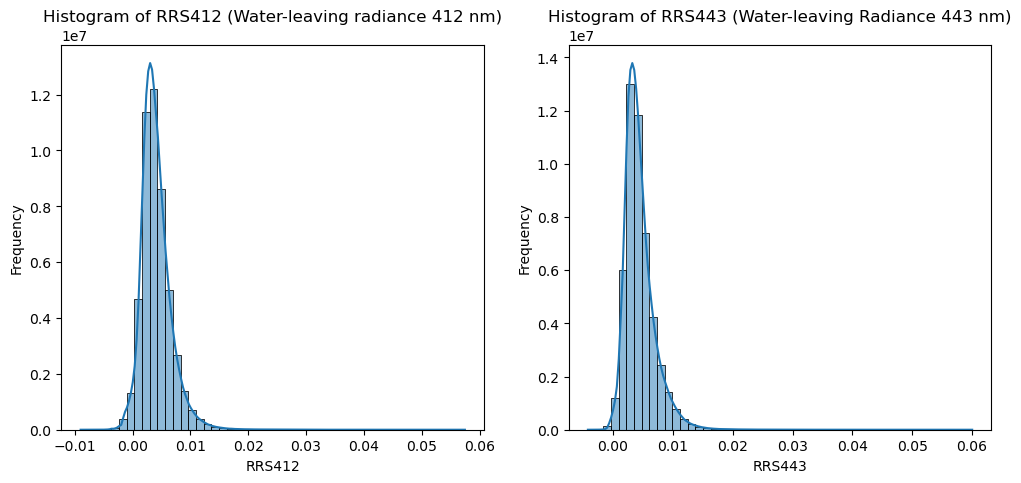

In [49]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(ref_filtered_df["RRS412"], bins=50, kde=True)
plt.title("Histogram of RRS412 (Water-leaving radiance 412 nm)")
plt.xlabel("RRS412")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(ref_filtered_df["RRS443"], bins=50, kde=True)
plt.title("Histogram of RRS443 (Water-leaving Radiance 443 nm)")
plt.xlabel("RRS443")
plt.ylabel("Frequency")
plt.show()

### 3.3.2 Time Series Plot of KD490 and zsd

<Figure size 1000x600 with 0 Axes>

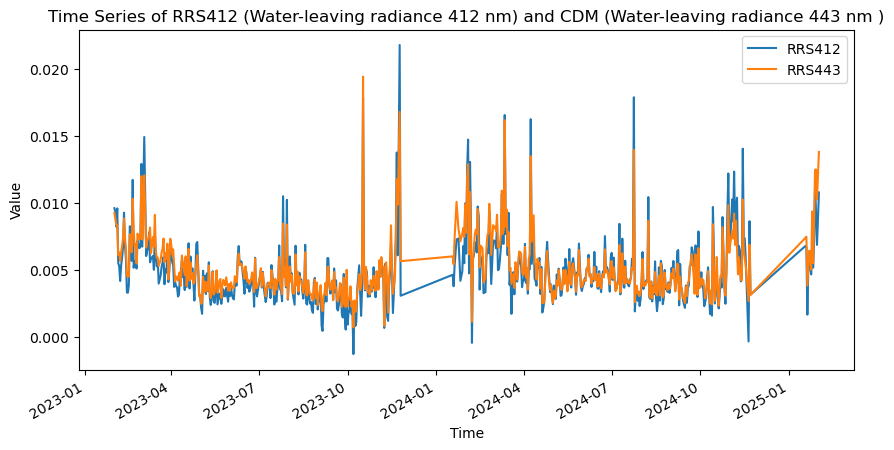

In [50]:
plt.figure(figsize=(10, 6))
ref_filtered_df.groupby("time")[["RRS412", "RRS443"]].mean().plot(figsize=(10, 5))
plt.title("Time Series of RRS412 (Water-leaving radiance 412 nm) and CDM (Water-leaving radiance 443 nm )")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(["RRS412", "RRS443"])
plt.show()

### 3.3.3 Scatter Plot of KD490 and zsd

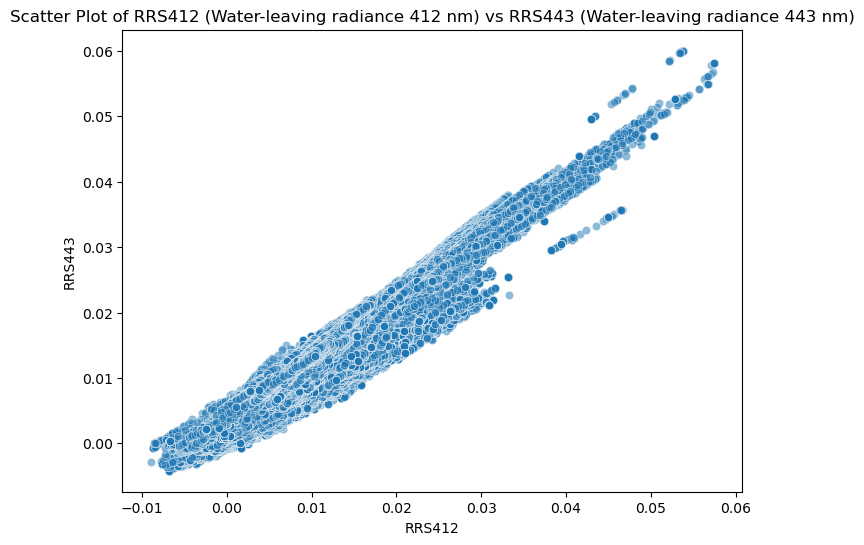

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ref_filtered_df["RRS412"], y=ref_filtered_df["RRS443"], alpha=0.5)
plt.xlabel("RRS412")
plt.ylabel("RRS443")
plt.title("Scatter Plot of RRS412 (Water-leaving radiance 412 nm) vs RRS443 (Water-leaving radiance 443 nm)")
plt.show()

### 3.3.4 Heatmap of KD490 and zsd

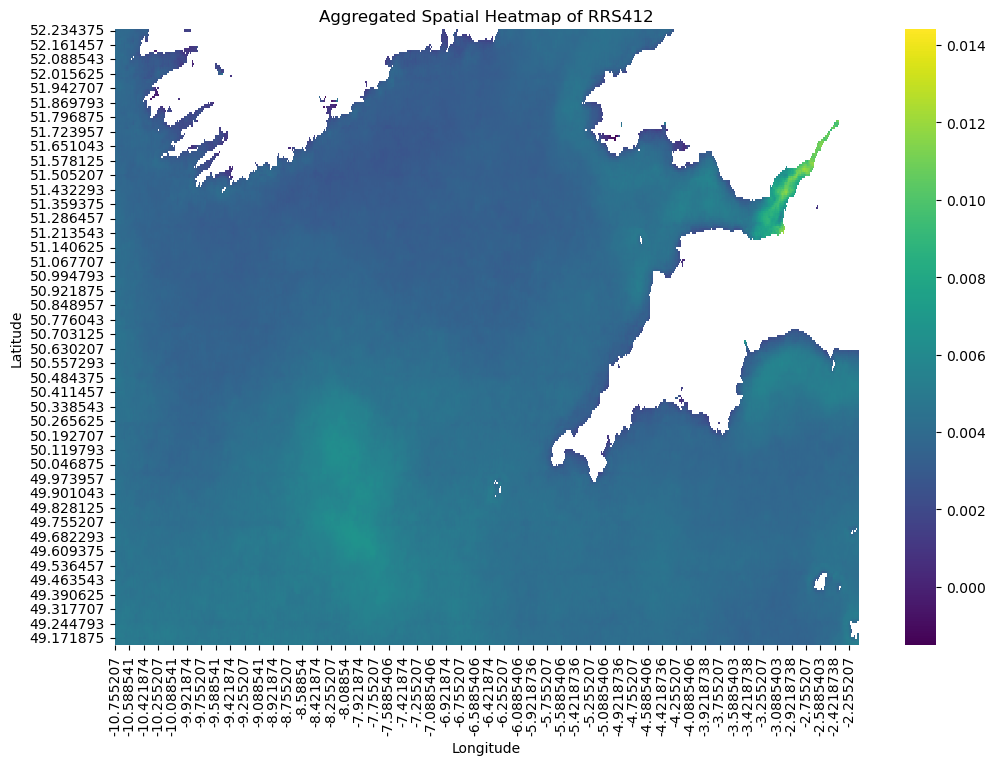

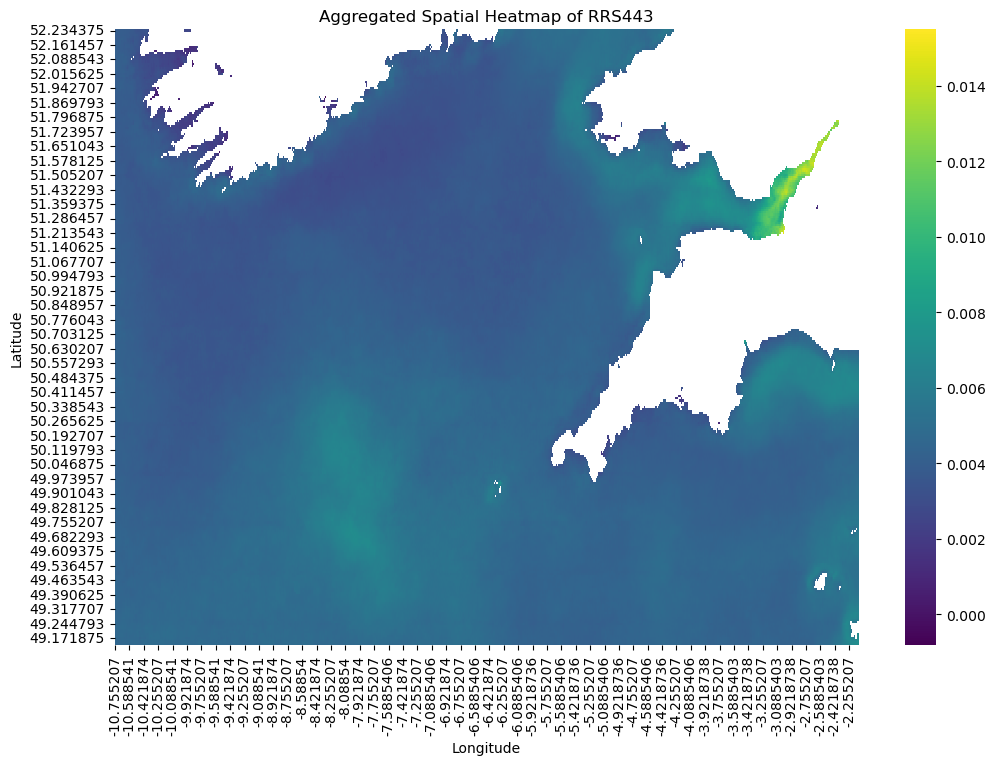

In [53]:
for col, title in zip(["RRS412", "RRS443"], ["RRS412", "RRS443"]):
    ref_aggregated_df = ref_filtered_df.groupby(["latitude", "longitude"], as_index=False)[col].mean()
    ref_spatial_df = ref_aggregated_df.pivot(index="latitude", columns="longitude", values=col)
    ref_spatial_df = ref_spatial_df[::-1]  # Reverse the order of latitude
    plt.figure(figsize=(12, 8))
    sns.heatmap(ref_spatial_df, cmap="viridis", cbar=True)
    plt.title(f"Aggregated Spatial Heatmap of {title}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

### 3.3.5 Boxplot of ZSD by month

In [10]:
# Load the Transparency dataset
ref_df_2 = pd.read_csv("/Users/imarcolic/Desktop/1 ACADEMIA/2.0 MSc LSE/1 MSc Data Science/ST498 Capstone/Imar not on Github/copernicus-data/Reflectance_L3_P1D_Feb23_25.csv", parse_dates=["time"])

# Handle missing values by dropping rows where ZSD or ZSD_uncertainty is NaN
ref_df_2 = ref_df_2.dropna(subset=["RRS412", "RRS412_uncertainty"])

# Extract Month for Monthly Analysis
ref_df_2["month"] = ref_df_2["time"].dt.month

/var/folders/_m/8v50fh8s6lsfsxj91ft8w3740000gn/T/ipykernel_51565/2125755151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="RRS412", data=ref_df_2, palette="coolwarm")


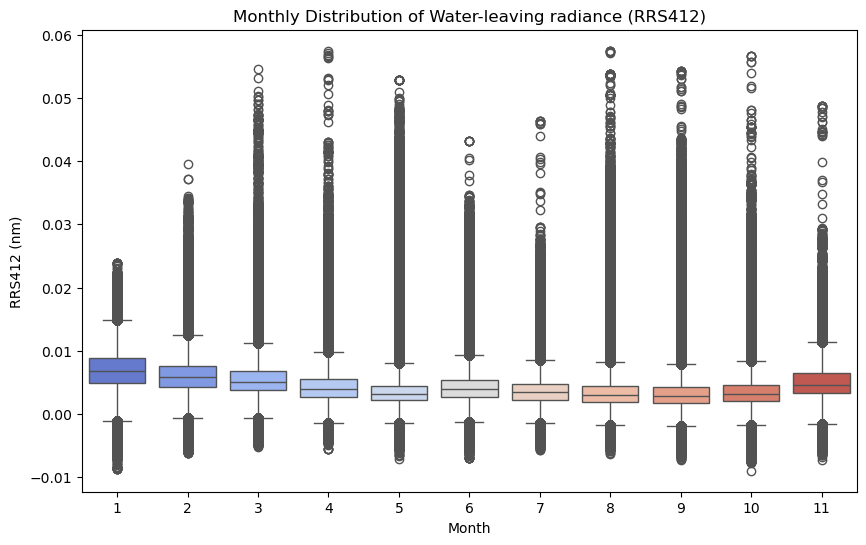

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="month", y="RRS412", data=ref_df_2, palette="coolwarm")
plt.title("Monthly Distribution of Water-leaving radiance (RRS412)")
plt.xlabel("Month")
plt.ylabel("RRS412 (nm)")
plt.show()

### 3.3.6 Monthly Heatmap of Water Transparency

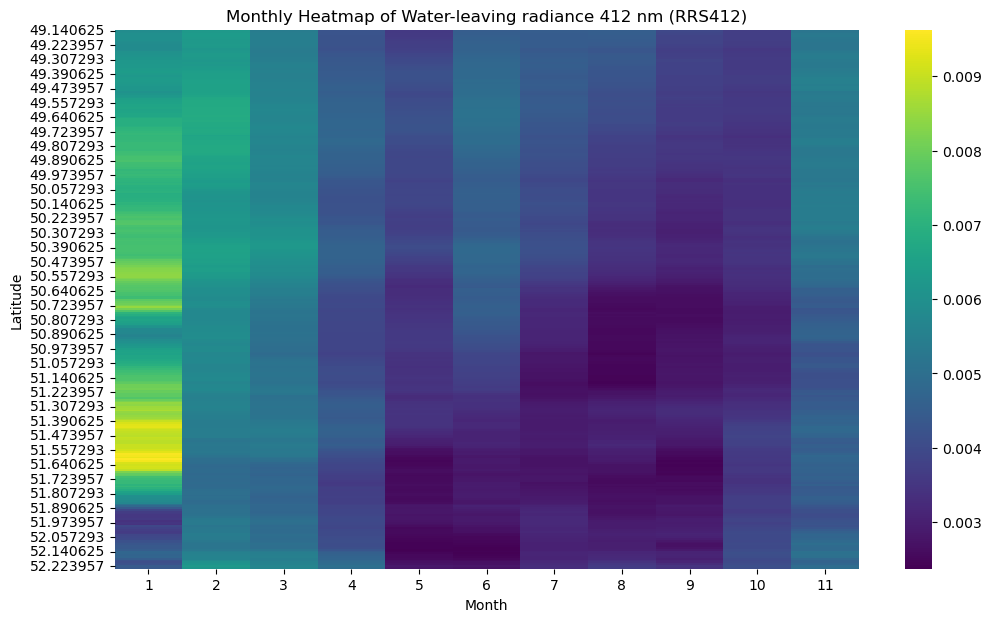

In [56]:
pivot_table = ref_df_2.pivot_table(values="RRS412", index="latitude", columns="month", aggfunc="mean")
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table, cmap="viridis", cbar=True)
plt.title("Monthly Heatmap of Water-leaving radiance 412 nm (RRS412)")
plt.xlabel("Month")
plt.ylabel("Latitude")
plt.show()

### 3.3.7 Histogram of ZSD Uncertainty

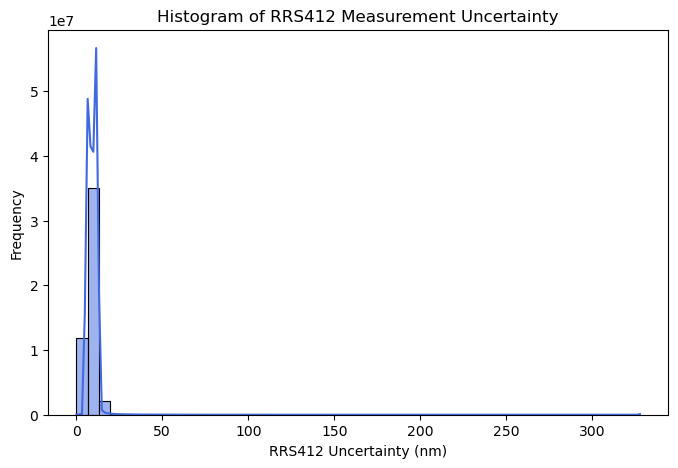

In [57]:
plt.figure(figsize=(8, 5))
sns.histplot(ref_df_2["RRS412_uncertainty"], bins=50, kde=True, color="royalblue")
plt.title("Histogram of RRS412 Measurement Uncertainty")
plt.xlabel("RRS412 Uncertainty (nm)")
plt.ylabel("Frequency")
plt.show()

### 3.3.8 3D Scatter Plot of ZSD vs Langitude vs Longitude

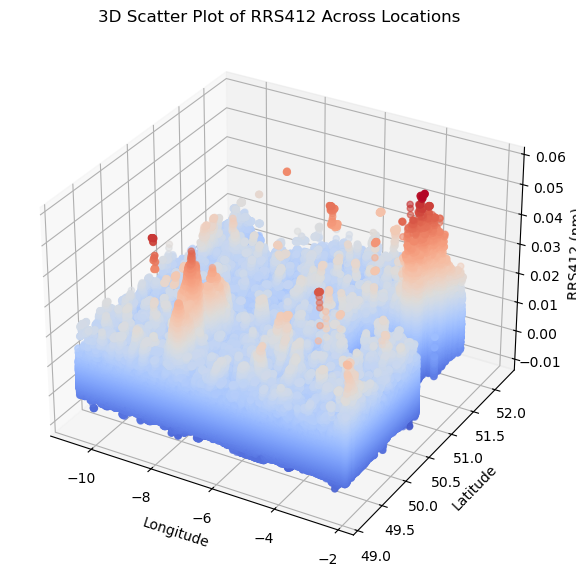

: 

In [65]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(ref_df_2["longitude"], ref_df_2["latitude"], ref_df_2["RRS412"], c=ref_df_2["RRS412"], cmap="coolwarm", alpha=0.6)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("RRS412 (nm)")
ax.set_title("3D Scatter Plot of RRS412 Across Locations")
plt.show()

### 3.3.9 Seasonal Decomposition of ZSD

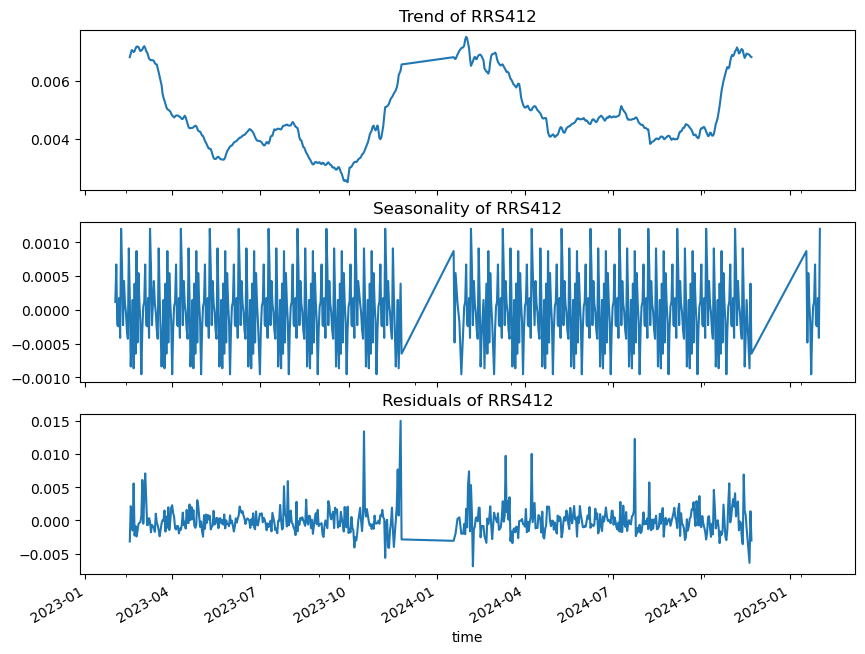

In [64]:
ref_df_daily = ref_df_2.groupby("time")["RRS412"].mean().reset_index()
ref_df_daily = ref_df_daily.set_index("time")
decomposition = sm.tsa.seasonal_decompose(ref_df_daily, model="additive", period=30)

fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
decomposition.trend.plot(ax=axes[0], title="Trend of RRS412")
decomposition.seasonal.plot(ax=axes[1], title="Seasonality of RRS412")
decomposition.resid.plot(ax=axes[2], title="Residuals of RRS412")
plt.show()

### 3.3.10 Correlation Heatmap of (ZSD, KD490, CHL, Uncertainty)

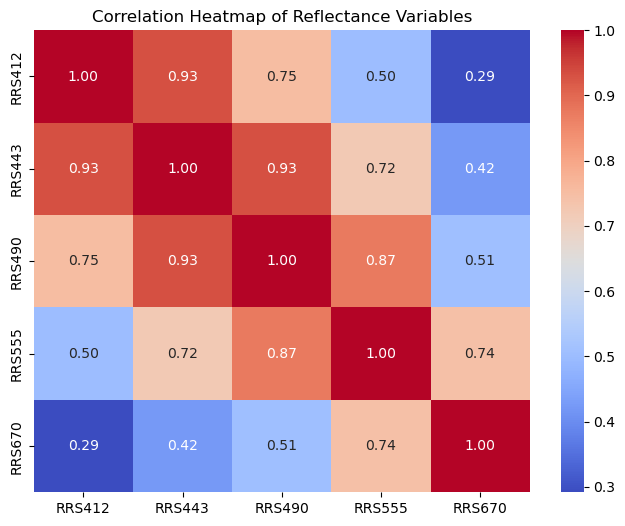

In [62]:
corr_columns = ["RRS412", "RRS443", "RRS490", "RRS555", "RRS670"]
corr_matrix = ref_df_2[corr_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Reflectance Variables")
plt.show()